In [55]:
import pandas as pd
import spacy
import steamreviews
import json
import csv
import os
import glob
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import re
import plotly
import seaborn as sns

## Reviews download
https://pypi.org/project/steamreviews/

In [56]:
dir_name = "data"
reviews_jsons = glob.glob(f"{dir_name}/*")
reviews_jsons

['data\\review_1150690.json',
 'data\\review_1172620.json',
 'data\\review_1341290.json',
 'data\\review_1515210.json',
 'data\\review_210970.json',
 'data\\review_219150.json',
 'data\\review_219890.json',
 'data\\review_250320.json',
 'data\\review_257510.json',
 'data\\review_262060.json',
 'data\\review_289070.json',
 'data\\review_294100.json',
 'data\\review_304430.json',
 'data\\review_394360.json',
 'data\\review_400.json',
 'data\\review_427520.json',
 'data\\review_460950.json',
 'data\\review_550.json',
 'data\\review_620.json',
 'data\\review_632470.json',
 'data\\review_646570.json',
 'data\\review_736260.json',
 'data\\review_860510.json']

In [57]:
title_dict = {"219150": "Hotline Miami",
              "1172620" : "Sea of Thieves",
              "460950" : "Katana ZERO",
              "262060" : "Darkest Dungeon",
              "250320" : "The Wolf Among Us",
              "210970" : "The Witness",
              "620" : "Portal 2",
              "736260" : "Baba Is You",
              "219890" : "Antichamber",
              "289070" : "Sid Meier's Civilization VI",
              "427520" : "Factorio",
              "257510" : "The Talos Principle",
             "304430" : "INSIDE",
             "400" : "Portal",
             "394360" : "Hearts of Iron IV",
             "632470" : "Disco Elysium",
             "294100" : "RimWorld",
              "646570" : "Slay the Spire",
              "1150690" : "Omori",
              "1341290" : "We Were Here Forever",
              "1515210" : "The Past Within",
              "860510" : "Little Nightmares II",
              "550" : "Left 4 Dead 2"}

In [58]:
genre_dict = {"219150": "A",
              "1172620" : "A",
              "460950" : "A",
              "262060" : "R",
              "250320" : "R",
              "210970" : "P",
              "620" : "P",
              "736260" : "P",
              "219890" : "P",
              "289070" : "S",
              "427520" : "S",
              "257510" : "P",
              "304430" : "P",
             "400" : "P",
             "394360" : "S",
             "632470" : "R",
             "294100" : "S",
             "646570" : "R",
             "1150690" : "R",
             "1341290" : "P",
             "1515210" : "P",
             "860510" : "P",
             "550" : "A"}

In [59]:
data_list = []
for i in reviews_jsons:
    with open(i, encoding = "utf-8") as json_file:
        json_data = json.load(json_file)
        reviews = json_data['reviews']
        file_name = json_file.name.split('.')[0].split('_')[1]
        for key in reviews.keys():
            data_list.append([title_dict.get(file_name),genre_dict.get(file_name),reviews[key]['author']['steamid'], reviews[key]['votes_up'], 
                          reviews[key]['review'], reviews[key]['weighted_vote_score'], reviews[key]['voted_up'],
                          reviews[key]['author']['num_games_owned'], reviews[key]['author']['playtime_at_review'],
                          reviews[key]['author']['num_reviews'], 
                          reviews[key]["timestamp_created"] ])
df = pd.DataFrame(data_list, columns = ["title", "genre","steamid", "votes_up", "review", "weighted_vote_score", "voted_up",
                                        "num_games_owned", "playtime_at_review", "num_reviews", "timestamp_created"])

## Wykresy

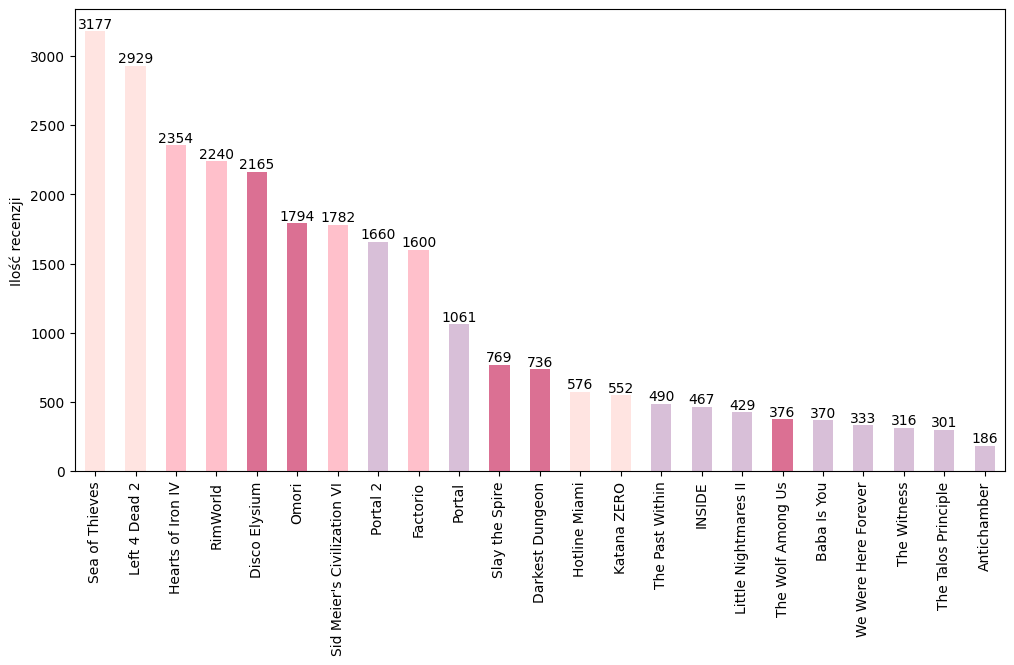

In [99]:
value_counts_title = df["title"].value_counts()
genre_colors = {"A": "mistyrose", "R": "palevioletred", "P": "thistle", "S": "pink"}
df['color'] = df['genre'].map(genre_colors)
colors = [df.loc[df['title'] == title]['color'].iloc[0] for title in value_counts_title.index]

plt.figure(figsize=(12, 6))
x = value_counts_title.plot(kind = "bar", color = colors)
plt.ylabel("Ilość recenzji")
plt.xticks(rotation = 90)
for i, count in enumerate(value_counts_title):
    x.text(i, count, count, va = "bottom", ha = "center")

plt.show()

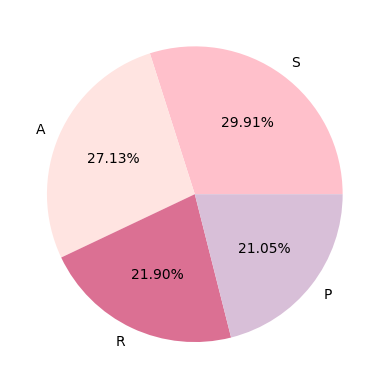

In [100]:
value_counts_genre = df["genre"].value_counts()
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
x = plt.pie(value_counts_genre, labels = value_counts_genre.index, colors=colors, autopct='%1.2f%%')
plt.show()

<Figure size 1200x600 with 0 Axes>

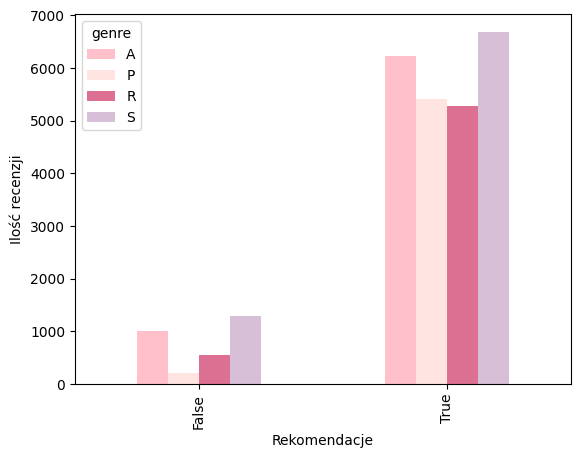

In [103]:
value_counts_recommendation_genre = df.groupby('genre').voted_up.value_counts().unstack(0)
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
plt.figure(figsize=(12, 6))
x = value_counts_recommendation_genre.plot(kind = "bar", color = colors, mark_right = True)
plt.ylabel("Ilość recenzji")
plt.xlabel("Rekomendacje")
plt.show()

In [97]:
percentage_pos = value_counts_recommendation_genre.iloc[1] / (value_counts_recommendation_genre.iloc[1] + value_counts_recommendation_genre.iloc[0]) * 100 
percentage_neg = value_counts_recommendation_genre.iloc[0] / (value_counts_recommendation_genre.iloc[0] + value_counts_recommendation_genre.iloc[1]) * 100 
print(percentage_pos)
print(percentage_neg)

genre
A    86.107271
P    96.490290
R    90.479452
S    83.826479
dtype: float64
genre
A    13.892729
P     3.509710
R     9.520548
S    16.173521
dtype: float64


In [64]:
df.sample(frac=0.3).head()

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
20878,Factorio,S,76561198058704648,29,The amount of Mental Gymnastics these develope...,0.503757476806640625,False,1204,1142,50,1674306914,pink
26132,Portal 2,P,76561199041516903,1,just play it\n,0.523809552192687988,True,0,313,14,1694969060,thistle
13979,RimWorld,S,76561198272284000,1,It's hard not to like Rimworld. The learning c...,0.518518567085266113,True,0,9883,13,1668520597,pink
9321,Darkest Dungeon,R,76561199060537637,1,"Very dark, and pretty dungeony.",0.523809552192687988,True,87,2027,13,1681274462,palevioletred
4066,Sea of Thieves,A,76561199021968583,2,"This game can be either the most calming, or t...",0.523809552192687988,True,58,3514,11,1675479471,mistyrose


In [65]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

## Preprocessing

1. Braki danych
2. Usunięcie duplikatów
4. Usunięcie recenzjii krótszych niż 3 słowa
9. Usunięcie znaków spcjalnych 
10. "Text lowering"
6. Usunięcie znaków interpunkcyjnych i liczb
7. Tokenizacja
8. Part-of-speech tagging
9. Lematyzacja

#### Braki danych

In [66]:
df.isna().sum()

title                  0
genre                  0
steamid                0
votes_up               0
review                 0
weighted_vote_score    0
voted_up               0
num_games_owned        0
playtime_at_review     0
num_reviews            0
timestamp_created      0
color                  0
dtype: int64

#### Usunięcie duplikatów

In [67]:
df.duplicated(subset='review').sum()

2580

In [68]:
df[df.duplicated(subset='review')].sample(59)

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
22622,Left 4 Dead 2,A,76561198822833363,1,Left 4 Dead 2,0.523809552192687988,True,10,60,10,2023-08-16 00:16:15,mistyrose
11131,Sid Meier's Civilization VI,S,76561199385494251,1,...,0.519999980926513672,True,0,8196,10,2023-08-22 22:40:56,pink
25604,Left 4 Dead 2,A,76561198847287431,1,add sex,0.5,True,44,777,30,2022-12-13 23:46:29,mistyrose
7767,Hotline Miami,A,76561199055480551,1,Do you like hurting other people?,0.523809552192687988,True,56,638,12,2022-12-05 09:39:09,mistyrose
4282,Sea of Thieves,A,76561199301193875,1,,0.523809552192687988,True,0,937,10,2022-12-29 20:11:48,mistyrose
16962,Hearts of Iron IV,S,76561199022361361,1,not bad,0.516129016876220703,True,0,60003,2,2023-08-03 19:33:12,pink
15262,Hearts of Iron IV,S,76561199110274380,2,good,0.545454561710357666,True,0,28170,2,2023-09-10 02:39:01,pink
3592,Sea of Thieves,A,76561198885108397,1,If you are looking for a review on Sea of Thie...,0.523809552192687988,True,0,9140,12,2023-05-10 01:54:05,mistyrose
17548,Hearts of Iron IV,S,76561198175898969,1,game gud,0.503105580806732178,True,0,2142,6,2023-09-20 02:39:11,pink
16058,Hearts of Iron IV,S,76561198881248662,1,this game makes me want to kill myself,0.523809552192687988,False,0,44629,1,2023-03-04 08:12:30,pink


In [69]:
(df.duplicated(subset='review') == False).sum()

29492

In [70]:
df = df[df.duplicated(subset='review') == False]

In [71]:
df.duplicated(subset='review').sum()

0

#### Czas gry mniejszy od godziny

#### Długość recenzji

In [72]:
df["temp_review_len"] = df["review"].apply(lambda x: x.split(" ").__len__())
df["temp_review_len"].describe()

count    29492.000000
mean        54.191984
std        135.354534
min          1.000000
25%          5.000000
50%         13.000000
75%         39.000000
max       3997.000000
Name: temp_review_len, dtype: float64

In [73]:
df[df["temp_review_len"] == df["temp_review_len"].max()]['review'].values

array(['t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y 

In [74]:
df[df["temp_review_len"] < 4].groupby(by=["genre"]).count()

,title,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color,temp_review_len
genre,,,,,,,,,,,,
A,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659
P,852,852,852,852,852,852,852,852,852,852,852,852
R,798,798,798,798,798,798,798,798,798,798,798,798
S,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140


In [75]:
df = df[df["temp_review_len"] >= 3]

In [76]:
suma = 0
for i in df["temp_review_len"]:
    suma += i

In [77]:
print("Ilość słów:", suma,
     "Ilość recenzji:", len(df["temp_review_len"]))

Ilość słów: 1593992 Ilość recenzji: 26663


### Wordcloud

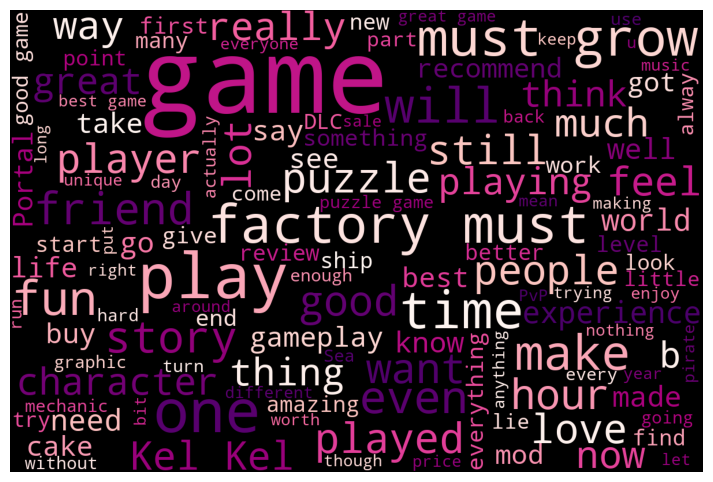

In [78]:
txt = ' '.join(i for i in df["review"])
wordcloud = WordCloud(max_font_size = 180,
                max_words = 120,
                width = 1200,
                height = 800,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

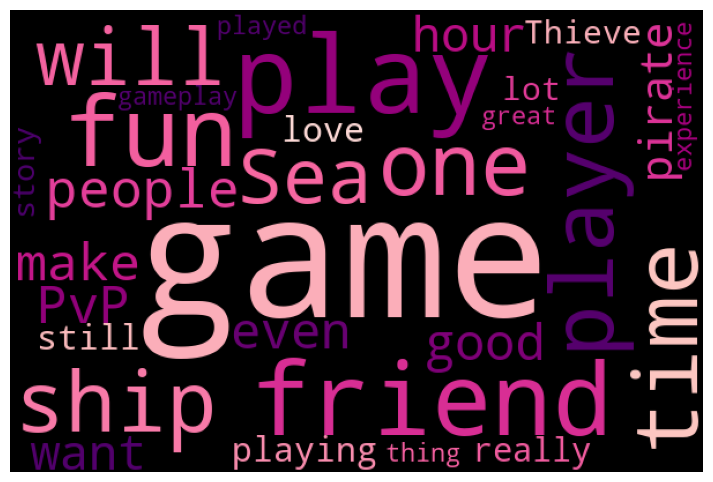

In [79]:
txt = ' '.join(i for i in df[df['genre'] == "A"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

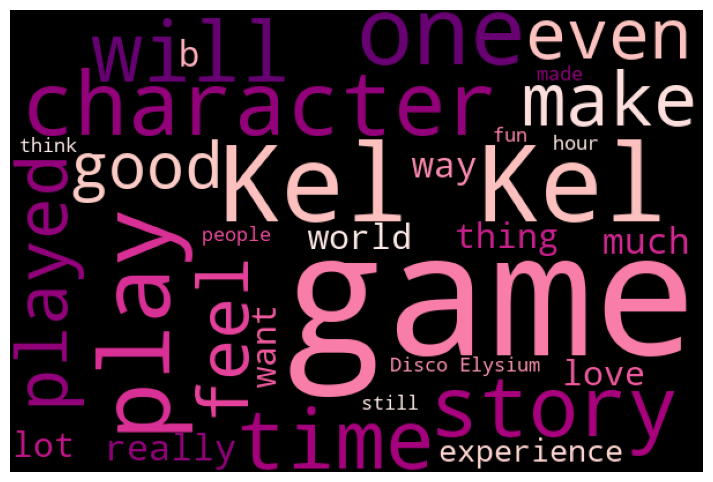

In [80]:
txt = ' '.join(i for i in df[df['genre'] == "R"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

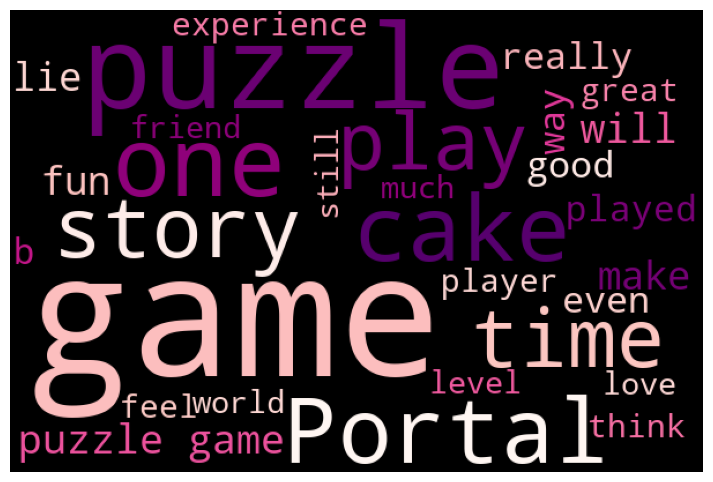

In [81]:
txt = ' '.join(i for i in df[df['genre'] == "P"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

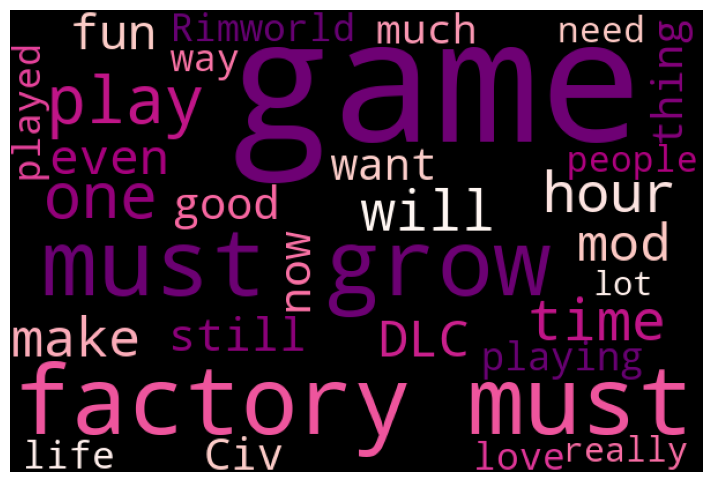

In [82]:
txt = ' '.join(i for i in df[df['genre'] == "S"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Usunięcie znaków, text lowering

In [83]:
df["review"] = df["review"].str.replace(r"\[.*?\]|\n|[^\x00-\x7F]+", "", regex=True).str.lower()

In [84]:
df["review"].sample(10)

5352     very good suggest buyng but only buy if u plan...
9143     this game is the reason people does cheats. al...
1839     12/10this game is amazing.i went in blind, and...
8928     if portal had a cool, older sibling, it would ...
19278    this game is 100% going to take over the rest ...
5513     incredibly fun with friends, difficult but not...
9877     spent $200 on dlc only for it to go on sale fo...
24446                              left 4 dead 2 is a cool
26135    this felt easier than portal 1. i thought it w...
6060     124 hours of gameplay and still confused on wh...
Name: review, dtype: object

#### Usunięcie znaków interpunkcyjnych i liczb

In [85]:
df["review"] = df["review"].str.replace(r"[0-9]", "", regex=True)

In [86]:
import string 
df["review"] = df["review"].str.replace('['  + string.punctuation + ']', "", regex =True)

In [87]:
df["review"].sample(5)

23277                                     with friends yes
14342    great game with massive modding community very...
16506    this game will probably improve your brain if ...
13650                                          its aight g
29069             extremely good rpg with a unique setting
Name: review, dtype: object

#### Tokenizacja

In [88]:
import nltk
df["tokenized"] = df["review"].apply(nltk.word_tokenize)

In [89]:
df["tokenized"].sample(15)

21361    [a, cyberpunk, samurai, junkie, who, oneshots,...
19918        [best, british, colony, simulator, on, steam]
7378     [great, puzzle, game, i, would, dare, to, say,...
29620    [do, not, buy, please, play, a, truly, inspiri...
12972                                 [pretty, good, game]
31288    [if, youve, taken, a, look, at, other, reviews...
27623    [so, good, i, sold, all, of, my, dads, left, t...
11896    [i, rescued, maxine, from, slavery, then, she,...
9270     [tldr, game, will, induce, masochism, through,...
20820    [the, factory, must, grow, and, the, bugs, wil...
21350    [katana, zero, reminds, me, a, lot, about, hot...
31525    [while, the, rules, are, simplethe, game, is, ...
21737    [timeless, zombie, game, that, managed, to, st...
18687    [i, am, lego, batman, i, have, escaped, the, c...
29978        [kim, is, the, best, waifu, in, video, games]
Name: tokenized, dtype: object

#### POS tagging

In [90]:
nltk.download('averaged_perceptron_tagger')
df["tagged"] = df["tokenized"].apply(nltk.pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Lematyzacja